# Predicting Sleep Disorders – Exploratory Data Analysis (EDA)

**Objective:**  
To explore the sleep health dataset, identify patterns, trends, and relationships between lifestyle, demographic, and health factors with sleep disorders (None, Insomnia, Sleep Apnea).  

This analysis supports feature selection and model development.


In [1]:
!pip install -q kagglehub

import kagglehub
import os
import pandas as pd

# Download latest version of the Kaggle dataset
path = kagglehub.dataset_download("mdsultanulislamovi/sleep-disorder-diagnosis-dataset")
print("Path to dataset files:", path)

# Load the CSV from the downloaded folder
csv_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(csv_path)

print(df.shape)
df.head(10)
df.info()
df.describe()
df.describe(include="object")

100%|██████████| 2.54k/2.54k [00:00<00:00, 4.51MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset/versions/1
(374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null   

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


The dataset contains multiple demographic, lifestyle, and health-related attributes along with a target variable indicating the type of sleep disorder.

The dataset includes both numerical and categorical features.  
The target variable is **Sleep Disorder**.

Statistical summaries provide insights into age range, sleep duration, stress levels, and categorical diversity such as occupation and BMI category.


In [2]:
df["Sleep Disorder"].value_counts()


,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


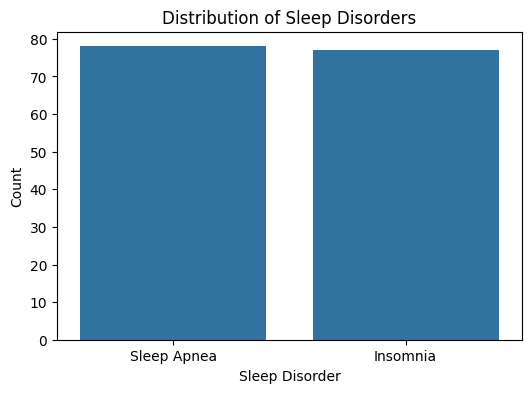

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Sleep Disorder", data=df)
plt.title("Distribution of Sleep Disorders")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.show()



The dataset contains three classes: None, Insomnia, and Sleep Apnea.  
Class imbalance is observed, which should be considered during model evaluation.


In [4]:
df.isnull().sum()
df.duplicated().sum()



np.int64(0)

The dataset is clean with no missing values or duplicate records.


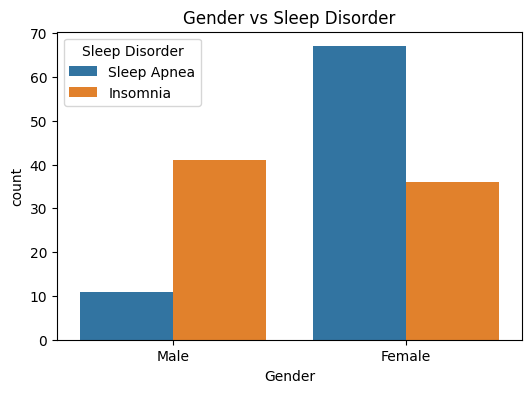

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Sleep Disorder", data=df)
plt.title("Gender vs Sleep Disorder")
plt.show()


Sleep Apnea is more common among males, while Insomnia appears slightly more prevalent among females.


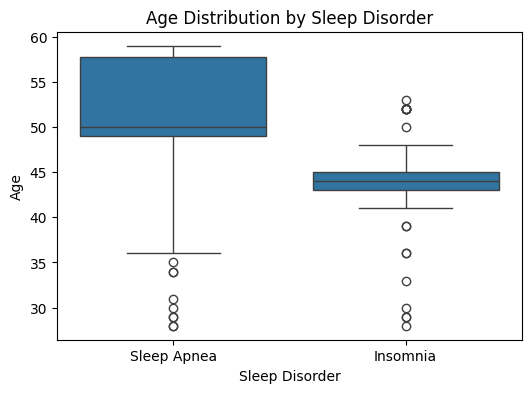

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Age", data=df)
plt.title("Age Distribution by Sleep Disorder")
plt.show()


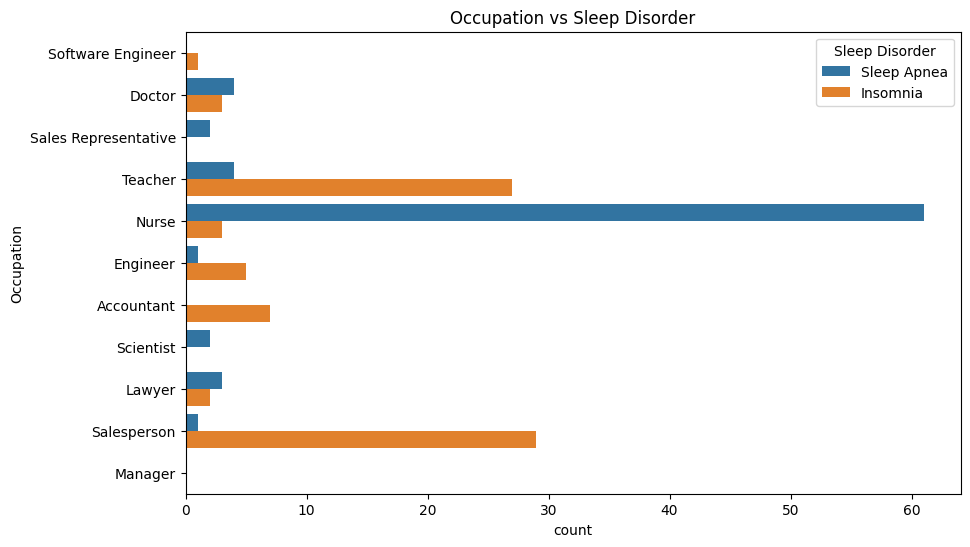

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(y="Occupation", hue="Sleep Disorder", data=df)
plt.title("Occupation vs Sleep Disorder")
plt.show()



High-stress occupations show a higher prevalence of sleep disorders, indicating occupational stress as a contributing factor.


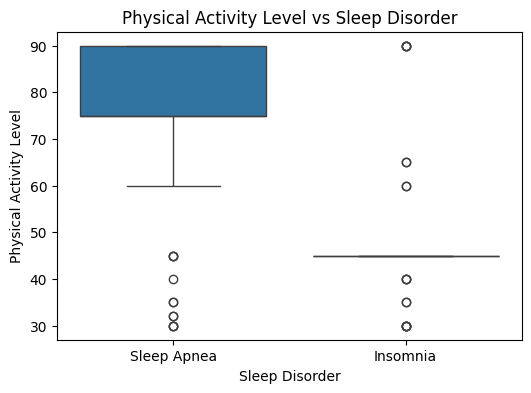

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Physical Activity Level", data=df)
plt.title("Physical Activity Level vs Sleep Disorder")
plt.show()



Lower physical activity levels are associated with a higher likelihood of sleep disorders, particularly Insomnia.


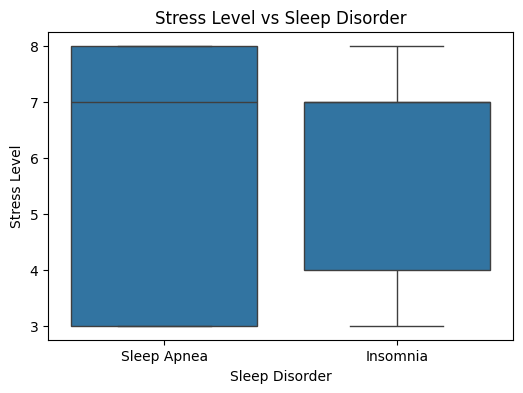

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=df)
plt.title("Stress Level vs Sleep Disorder")
plt.show()



Individuals with higher stress levels are more likely to experience sleep disorders, especially Insomnia.


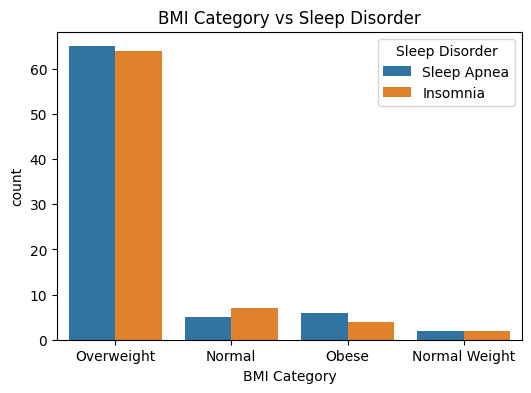

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="BMI Category", hue="Sleep Disorder", data=df)
plt.title("BMI Category vs Sleep Disorder")
plt.show()


Obese individuals show a significantly higher prevalence of Sleep Apnea, highlighting BMI as an important risk factor.


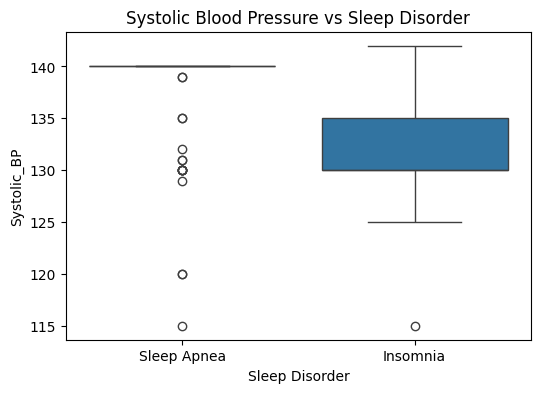

In [12]:
df[["Systolic_BP", "Diastolic_BP"]] = (
    df["Blood Pressure"].str.split("/", expand=True).astype(int)
)
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Systolic_BP", data=df)
plt.title("Systolic Blood Pressure vs Sleep Disorder")
plt.show()


Higher blood pressure values are strongly associated with Sleep Apnea, indicating cardiovascular health as a key factor.


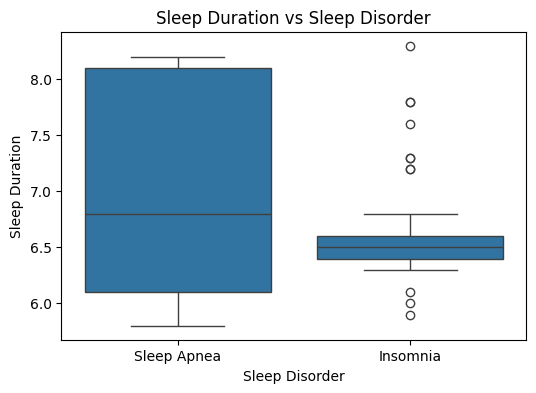

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=df)
plt.title("Sleep Duration vs Sleep Disorder")
plt.show()


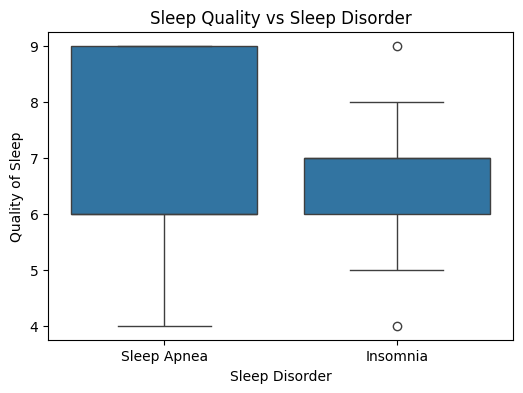

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=df)
plt.title("Sleep Quality vs Sleep Disorder")
plt.show()


Poor sleep quality and shorter sleep duration are strong indicators of sleep disorders.


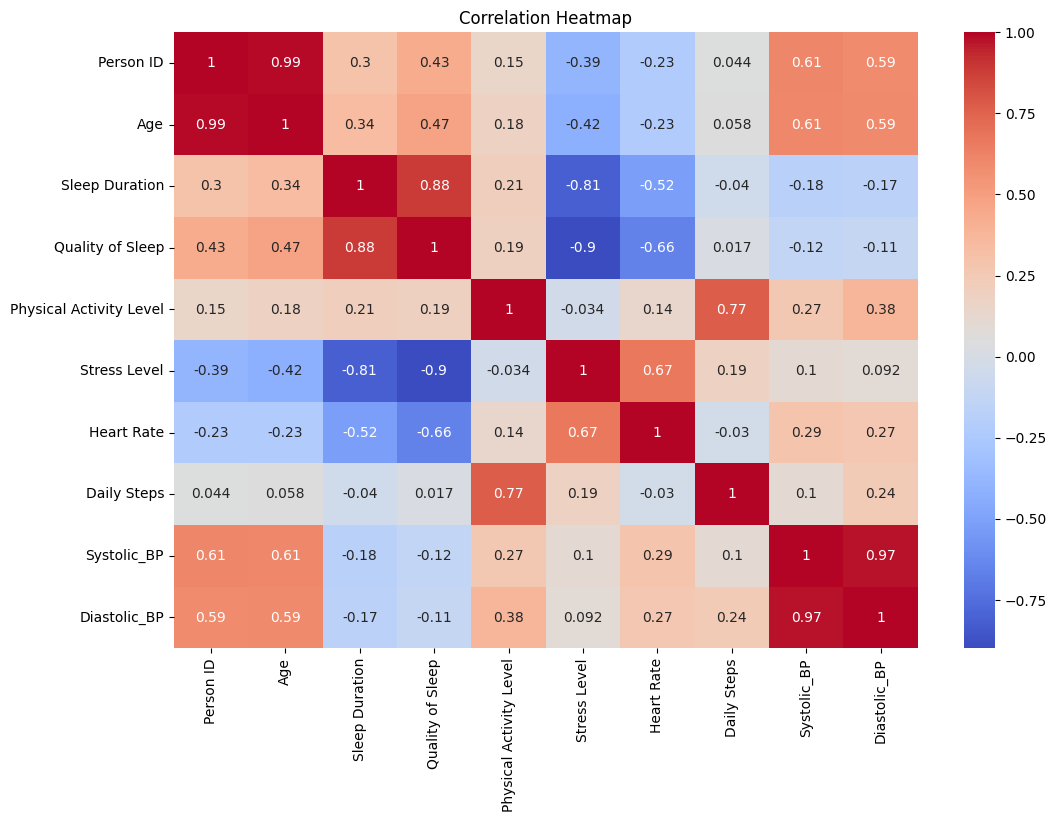

In [15]:
import numpy as np
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Sleep quality, stress level, blood pressure, and BMI-related features show meaningful correlations with sleep disorders.


## Key EDA Findings

- Sleep disorders are influenced by age, stress, BMI, blood pressure, and lifestyle factors
- Sleep quality is the strongest predictor of sleep disorders
- Sleep Apnea is prevalent among older, obese individuals with higher blood pressure
- Insomnia is strongly linked to stress and reduced sleep duration
- Occupational and lifestyle factors play a significant role


In [16]:
df.to_csv("sleep_cleaned.csv", index=False)



In [17]:
pd.read_csv("sleep_cleaned.csv").head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


Various factors in a persons life can cause  sleep disorder

Dataset Shape: (374, 15)
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Systolic_BP  \
0         126/83          77         4200            N

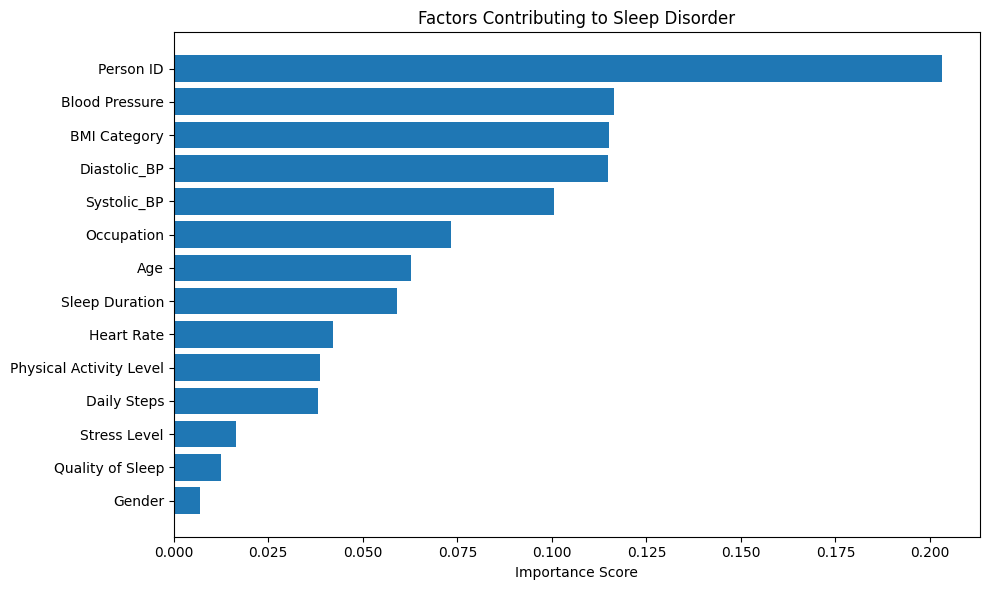

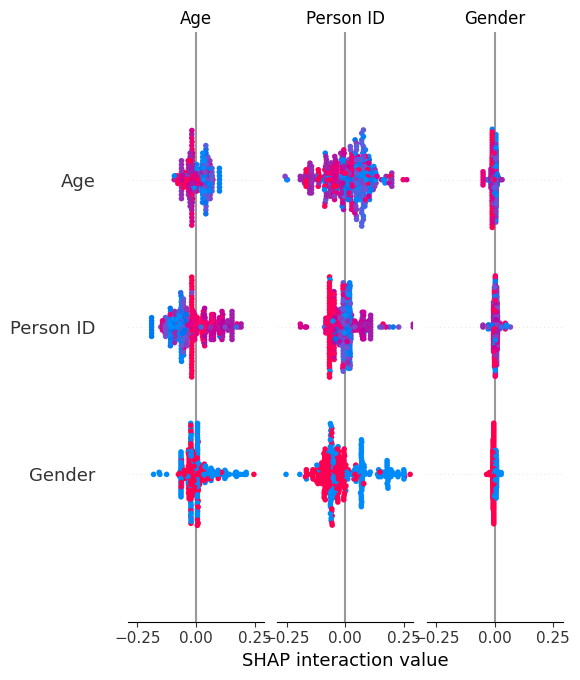

In [18]:

# Sleep Disorder Factor Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("sleep_cleaned.csv")

print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())

TARGET_COLUMN = "Sleep Disorder"

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

le = LabelEncoder()

for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])

if y.dtype == "object":
    y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFactors Causing Sleep Disorder:\n")
print(feature_importance)

plt.figure(figsize=(10,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.gca().invert_yaxis()
plt.title("Factors Contributing to Sleep Disorder")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


MACHINE LEARNING MODELS COMPARISON - SLEEP DISORDER CLASSIFICATION
Training set size: 299 | Test set size: 75
Features: 14 | Classes: 3


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression:
  Accuracy:  0.8533
  Precision: 0.8700
  Recall:    0.8533
  R1 Score:  0.8572
  CV Mean (F1): 0.9045

Decision Tree:
  Accuracy:  0.8800
  Precision: 0.8809
  Recall:    0.8800
  R1 Score:  0.8758
  CV Mean (F1): 0.8727

Random Forest:
  Accuracy:  0.9333
  Precision: 0.9332
  Recall:    0.9333
  R1 Score:  0.9329
  CV Mean (F1): 0.8952

Gradient Boosting:
  Accuracy:  0.8933
  Precision: 0.8912
  Recall:    0.8933
  R1 Score:  0.8900
  CV Mean (F1): 0.8845

AdaBoost:
  Accuracy:  0.8933
  Precision: 0.8962
  Recall:    0.8933
  R1 Score:  0.8945
  CV Mean (F1): 0.8805

SVM (RBF):
  Accuracy:  0.6400
  Precision: 0.5543
  Recall:    0.6400
  R1 Score:  0.5515
  CV Mean (F1): 0.4725

K-Nearest Neighbors:
  Accuracy:  0.8800
  Precision: 0.8800
  Recall:    0.8800
  R1 Score:  0.8800
  CV Mean (F1): 0.8654

Naive Bayes:
  Accuracy:  0.8667
  Precision: 0.8862
  Recall:    0.8667
  R1 Score:  0.8696
  CV Mean (F1): 0.8926

XGBoost:
  Accuracy:  0.9067
  Precision: 

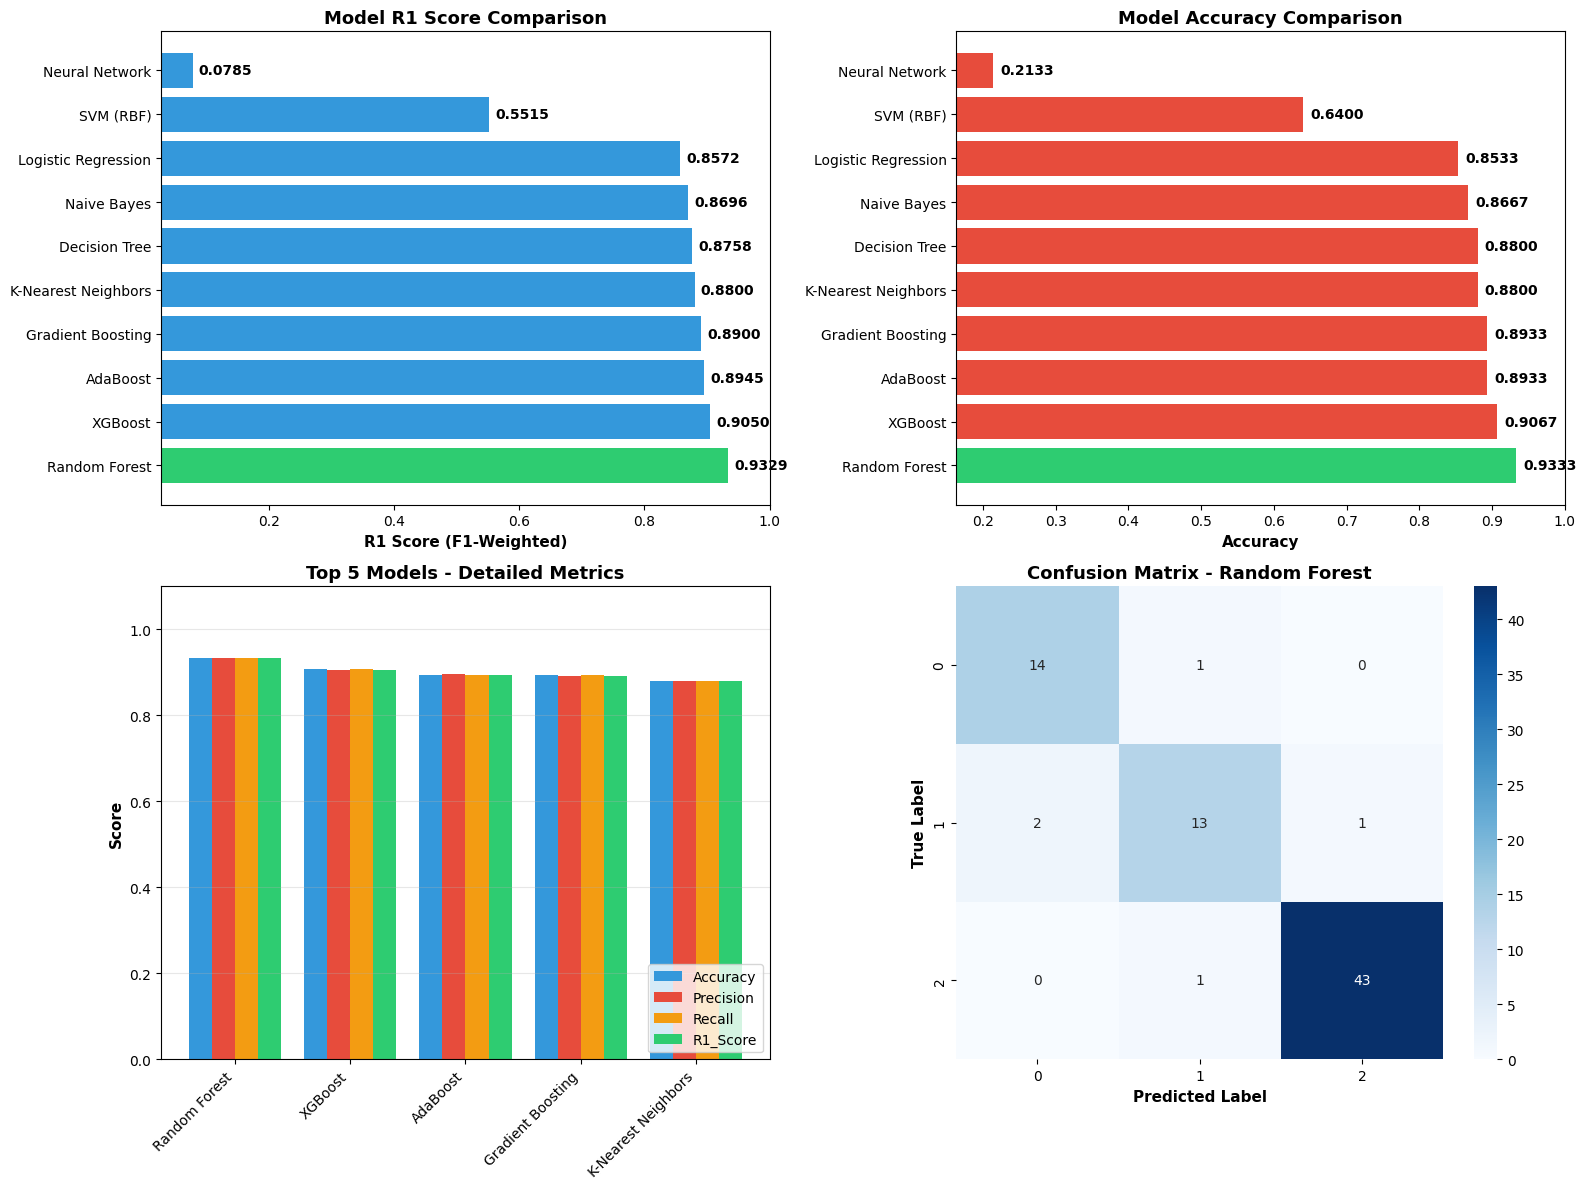


Summary: Random Forest achieved the highest R1 Score of 0.9329


In [19]:
# Machine Learning Models Comparison - Sleep Disorder Classification
# Testing Multiple Algorithms with R1 (F1) Score Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import various ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load and prepare data
df = pd.read_csv("sleep_cleaned.csv")
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])

if y.dtype == "object":
    y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*80)
print("MACHINE LEARNING MODELS COMPARISON - SLEEP DISORDER CLASSIFICATION")
print("="*80)
print(f"Training set size: {X_train.shape[0]} | Test set size: {X_test.shape[0]}")
print(f"Features: {X.shape[1]} | Classes: {len(np.unique(y))}")
print("="*80)

# Dictionary to store model results
results = {}

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, verbosity=0),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # R1 Score = F1 Score (weighted avg)

        # Cross-validation score
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
        cv_mean = cv_scores.mean()

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'R1_Score': f1,
            'CV_Mean': cv_mean,
            'Model': model
        }

        print(f"\n{model_name}:")
        print(f"  Accuracy:  {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  R1 Score:  {f1:.4f}")
        print(f"  CV Mean (F1): {cv_mean:.4f}")

    except Exception as e:
        print(f"\n{model_name}: Error - {str(e)}")

print("\n" + "="*80)
# Create Results DataFrame
results_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': result['Accuracy'],
        'Precision': result['Precision'],
        'Recall': result['Recall'],
        'R1_Score': result['R1_Score'],
        'CV_Mean': result['CV_Mean']
    }
    for model_name, result in results.items()
]).sort_values('R1_Score', ascending=False)

print("\nMODEL PERFORMANCE COMPARISON (Sorted by R1 Score - Highest First):")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_r1_score = results_df.iloc[0]['R1_Score']
best_model = results[best_model_name]['Model']

print(f"\n{'*'*100}")
print(f"BEST MODEL: {best_model_name}")
print(f"R1 Score (F1-Weighted): {best_r1_score:.4f}")
print(f"Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"{'*'*100}")

# Detailed report for best model
y_pred_best = best_model.predict(X_test)
print(f"\nDETAILED CLASSIFICATION REPORT - {best_model_name}:")
print(classification_report(y_test, y_pred_best))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R1 Score Comparison
ax1 = axes[0, 0]
colors = ['#2ecc71' if score == best_r1_score else '#3498db' for score in results_df['R1_Score']]
ax1.barh(results_df['Model'], results_df['R1_Score'], color=colors)
ax1.set_xlabel('R1 Score (F1-Weighted)', fontsize=11, fontweight='bold')
ax1.set_title('Model R1 Score Comparison', fontsize=13, fontweight='bold')
ax1.set_xlim([min(results_df['R1_Score'])-0.05, 1.0])
for i, v in enumerate(results_df['R1_Score']):
    ax1.text(v+0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# 2. Accuracy Comparison
ax2 = axes[0, 1]
colors = ['#2ecc71' if score == results_df.iloc[0]['Accuracy'] else '#e74c3c' for score in results_df['Accuracy']]
ax2.barh(results_df['Model'], results_df['Accuracy'], color=colors)
ax2.set_xlabel('Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
ax2.set_xlim([min(results_df['Accuracy'])-0.05, 1.0])
for i, v in enumerate(results_df['Accuracy']):
    ax2.text(v+0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# 3. Multi-metric Comparison for Top 5 Models
ax3 = axes[1, 0]
top_5 = results_df.head(5)
x = np.arange(len(top_5))
width = 0.2
ax3.bar(x - width*1.5, top_5['Accuracy'], width, label='Accuracy', color='#3498db')
ax3.bar(x - width/2, top_5['Precision'], width, label='Precision', color='#e74c3c')
ax3.bar(x + width/2, top_5['Recall'], width, label='Recall', color='#f39c12')
ax3.bar(x + width*1.5, top_5['R1_Score'], width, label='R1_Score', color='#2ecc71')
ax3.set_ylabel('Score', fontsize=11, fontweight='bold')
ax3.set_title('Top 5 Models - Detailed Metrics', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(top_5['Model'], rotation=45, ha='right')
ax3.legend(loc='lower right')
ax3.set_ylim([0, 1.1])
ax3.grid(axis='y', alpha=0.3)

# 4. Confusion Matrix for Best Model
ax4 = axes[1, 1]
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4, cbar=True)
ax4.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
ax4.set_ylabel('True Label', fontsize=11, fontweight='bold')
ax4.set_title(f'Confusion Matrix - {best_model_name}', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*100)
print(f"Summary: {best_model_name} achieved the highest R1 Score of {best_r1_score:.4f}")
print("="*100)